In [90]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

In [91]:
prevData = pd.read_csv('master.csv')
prevData.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [92]:
data = prevData[['country', 'age', 'sex', 'suicides_no']]
data.head()

,country,age,sex,suicides_no
0,Albania,15-24 years,male,21
1,Albania,35-54 years,male,16
2,Albania,15-24 years,female,14
3,Albania,75+ years,male,1
4,Albania,25-34 years,male,9


In [93]:
selDimensions = ['country', 'sex', 'age']

dimensions = [ data[selDimensions[i]].unique().tolist() for i in range(len(selDimensions)) ]
dataCount = [ [] for _ in range(len(selDimensions)) ]

In [94]:
# Create Partitions(Paging) corresponding to the chosen dimensions

def pagingPartitions(index):
    for i in range(len(dimensions[index])):
        check = data[selDimensions[index]] == dimensions[index][i]
        data[check].to_csv('partitions/' + dimensions[index][i] + '.csv', index=False)


In [95]:
def BUC(input, d, minSupport, file):
    for i in range(d, len(dimensions)):
        dataCount[i] = [ input[input[selDimensions[i]] == val]['suicides_no'].sum() for val in dimensions[i] ] 
        
        for j in range(len(dimensions[i])):
            if(dataCount[i][j] > minSupport):
                file.write('\t'*2*(d+1) + dimensions[i][j] + '  ' + str(dataCount[i][j]) + '\n')
                check = input[selDimensions[i]] == dimensions[i][j]
                BUC(input[check], i + 1, minSupport, file)

In [98]:
with open('q2_part2.txt', 'w') as file:
    minSupport = [ val for val in range(1000, 5000, 500) ]
    runTime = []

    for val in range(1000, 5000, 500):
        start = time.time()
        for i in range(len(dimensions)):
            pagingPartitions(i)
            for j in range(len(dimensions[i])):
                input = pd.read_csv('partitions/' + dimensions[i][j] + '.csv')
                if(input['suicides_no'].sum() > val):
                    file.write(dimensions[i][j] + '\t' + str(input['suicides_no'].sum()) + '\n')
                    BUC(input, i + 1, val, file)

        end = time.time()
        runTime.append(end - start)

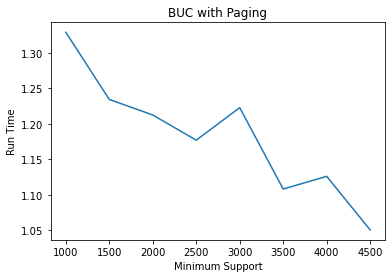

In [99]:
plt.plot(minSupport, runTime)
plt.xlabel('Minimum Support')
plt.ylabel('Run Time')
plt.title('BUC with Paging')
plt.show()

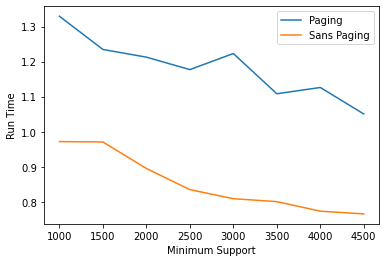

In [100]:
plt.plot(minSupport, runTime, label='Paging')
plt.plot(minSupport, list(pd.read_csv('runTime.csv')['0']), label='Sans Paging')
plt.xlabel('Minimum Support')
plt.ylabel('Run Time')

plt.legend()
plt.savefig('BUCComparison.jpg')
plt.show()